In [119]:
# Import our dependencies
import pandas as pd
import sklearn as skl
from pathlib import Path
from sklearn.preprocessing import StandardScaler

In [120]:
# Read in Housing data
df = pd.read_csv(Path('./Resources/house2datav2.csv'))
df.head()

,price,address,zip,date,bds,bath,sqft,boro,employed,unemployed,incomeabovehk,incomebelowhk
0,150000,"4105 Fort Hamilton Pkwy, Brooklyn, NY 11219",11219,8/30/20,0,1.0,"1,060",Kings County (Brooklyn),1149461,48699,188640,1067440
1,5850,"3272 Steinway St, Long Island City, NY 11103",11103,8/31/20,0,1.0,"1,070",Queens County,1099996,39401,166650,1015040
2,699000,"3014 Gunther Ave, Bronx, NY 10469",10469,9/1/20,0,1.0,"1,800",Bronx County,565642,32035,44610,621050
3,22000000,"178 Prince St, New York, NY 10012",10012,9/2/20,0,1.0,"11,165",New York County,879665,31973,300250,594060
4,115000,"424 E 115th St #2A, New York, NY 10029",10029,9/3/20,0,1.0,120,New York County,879665,31973,300250,594060


In [121]:
# Print out the boro value counts
boro_counts = df.boro.value_counts()
boro_counts

New York County                    171
Kings County (Brooklyn)            160
Queens County                      151
Richmond County (Staten Island)    124
Bronx County                        81
Name: boro, dtype: int64

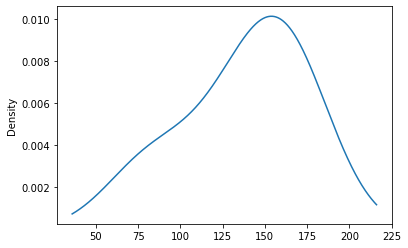

In [122]:
# Visualize the value counts
boro_counts.plot.density()


In [123]:
new_df = df.drop(['address', 'date'], axis=1)
new_df.head()


,price,zip,bds,bath,sqft,boro,employed,unemployed,incomeabovehk,incomebelowhk
0,150000,11219,0,1.0,"1,060",Kings County (Brooklyn),1149461,48699,188640,1067440
1,5850,11103,0,1.0,"1,070",Queens County,1099996,39401,166650,1015040
2,699000,10469,0,1.0,"1,800",Bronx County,565642,32035,44610,621050
3,22000000,10012,0,1.0,"11,165",New York County,879665,31973,300250,594060
4,115000,10029,0,1.0,120,New York County,879665,31973,300250,594060


In [124]:
# Create the OneHotEncoder instance
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)


In [125]:
# Fit the encoder and produce encoded DataFrame
encode_df = pd.DataFrame(enc.fit_transform(new_df.boro.values.reshape(-1,1)))

In [126]:
# Rename encoded columns
encode_df.columns = enc.get_feature_names(['boro'])
encode_df.head()

,boro_Bronx County,boro_Kings County (Brooklyn),boro_New York County,boro_Queens County,boro_Richmond County (Staten Island)
0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0


In [127]:
# Merge the two DataFrames together and drop the boro column
new2_df=new_df.merge(encode_df,left_index=True,right_index=True).drop("boro",1)
new2_df.head()

,price,zip,bds,bath,sqft,employed,unemployed,incomeabovehk,incomebelowhk,boro_Bronx County,boro_Kings County (Brooklyn),boro_New York County,boro_Queens County,boro_Richmond County (Staten Island)
0,150000,11219,0,1.0,"1,060",1149461,48699,188640,1067440,0.0,1.0,0.0,0.0,0.0
1,5850,11103,0,1.0,"1,070",1099996,39401,166650,1015040,0.0,0.0,0.0,1.0,0.0
2,699000,10469,0,1.0,"1,800",565642,32035,44610,621050,1.0,0.0,0.0,0.0,0.0
3,22000000,10012,0,1.0,"11,165",879665,31973,300250,594060,0.0,0.0,1.0,0.0,0.0
4,115000,10029,0,1.0,120,879665,31973,300250,594060,0.0,0.0,1.0,0.0,0.0


In [128]:
#Find null Values

for column in new2_df.columns:
    print(f"Column {column} has {new2_df[column].isnull().sum()} null values")

Column price has 0 null values
Column zip has 0 null values
Column bds has 0 null values
Column bath has 0 null values
Column sqft has 0 null values
Column employed has 0 null values
Column unemployed has 0 null values
Column incomeabovehk has 0 null values
Column incomebelowhk has 0 null values
Column boro_Bronx County has 0 null values
Column boro_Kings County (Brooklyn) has 0 null values
Column boro_New York County has 0 null values
Column boro_Queens County has 0 null values
Column boro_Richmond County (Staten Island) has 0 null values


In [129]:
# List dataframe data types
new2_df.dtypes


price                                     int64
zip                                       int64
bds                                       int64
bath                                    float64
sqft                                     object
employed                                  int64
unemployed                                int64
incomeabovehk                             int64
incomebelowhk                             int64
boro_Bronx County                       float64
boro_Kings County (Brooklyn)            float64
boro_New York County                    float64
boro_Queens County                      float64
boro_Richmond County (Staten Island)    float64
dtype: object

In [130]:
new2_df['sqft']=new2_df['sqft'].str.replace(',','')
new2_df.head()

,price,zip,bds,bath,sqft,employed,unemployed,incomeabovehk,incomebelowhk,boro_Bronx County,boro_Kings County (Brooklyn),boro_New York County,boro_Queens County,boro_Richmond County (Staten Island)
0,150000,11219,0,1.0,1060,1149461,48699,188640,1067440,0.0,1.0,0.0,0.0,0.0
1,5850,11103,0,1.0,1070,1099996,39401,166650,1015040,0.0,0.0,0.0,1.0,0.0
2,699000,10469,0,1.0,1800,565642,32035,44610,621050,1.0,0.0,0.0,0.0,0.0
3,22000000,10012,0,1.0,11165,879665,31973,300250,594060,0.0,0.0,1.0,0.0,0.0
4,115000,10029,0,1.0,120,879665,31973,300250,594060,0.0,0.0,1.0,0.0,0.0


In [131]:
new2_df.astype({'sqft': 'int64'}).dtypes

price                                     int64
zip                                       int64
bds                                       int64
bath                                    float64
sqft                                      int64
employed                                  int64
unemployed                                int64
incomeabovehk                             int64
incomebelowhk                             int64
boro_Bronx County                       float64
boro_Kings County (Brooklyn)            float64
boro_New York County                    float64
boro_Queens County                      float64
boro_Richmond County (Staten Island)    float64
dtype: object

In [132]:
new2_df['zip']=new2_df['zip'].astype('str')
new2_df.head()

,price,zip,bds,bath,sqft,employed,unemployed,incomeabovehk,incomebelowhk,boro_Bronx County,boro_Kings County (Brooklyn),boro_New York County,boro_Queens County,boro_Richmond County (Staten Island)
0,150000,11219,0,1.0,1060,1149461,48699,188640,1067440,0.0,1.0,0.0,0.0,0.0
1,5850,11103,0,1.0,1070,1099996,39401,166650,1015040,0.0,0.0,0.0,1.0,0.0
2,699000,10469,0,1.0,1800,565642,32035,44610,621050,1.0,0.0,0.0,0.0,0.0
3,22000000,10012,0,1.0,11165,879665,31973,300250,594060,0.0,0.0,1.0,0.0,0.0
4,115000,10029,0,1.0,120,879665,31973,300250,594060,0.0,0.0,1.0,0.0,0.0


In [133]:
new2_df.dtypes

price                                     int64
zip                                      object
bds                                       int64
bath                                    float64
sqft                                     object
employed                                  int64
unemployed                                int64
incomeabovehk                             int64
incomebelowhk                             int64
boro_Bronx County                       float64
boro_Kings County (Brooklyn)            float64
boro_New York County                    float64
boro_Queens County                      float64
boro_Richmond County (Staten Island)    float64
dtype: object

In [134]:
# Print out the boro value counts
zip_counts = df.zip.value_counts()
zip_counts

10312    21
10314    20
10019    20
11201    17
11234    16
         ..
11436     1
11426     1
11419     1
11415     1
10027     1
Name: zip, Length: 146, dtype: int64

In [136]:
# Determine which values to replace
replace_zip = list(zip_counts[zip_counts < 10].index)

# Replace in DataFrame
for zip in replace_zip:
    new2_df.zip = new2_df.zip.replace(zip,"Other")


# Check to make sure binning was successful
new2_df.zip.value_counts()

10312    21
10314    20
10019    20
11201    17
11234    16
         ..
11109     1
10455     1
10044     1
10036     1
11694     1
Name: zip, Length: 146, dtype: int64

In [118]:
# Create the OneHotEncoder instance
from sklearn.preprocessing import OneHotEncoder
enc2 = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode2_df = pd.DataFrame(enc2.fit_transform(new2_df.zip.values.reshape(-1,1)))

# Rename encoded columns
new2_df.columns = enc2.get_feature_names(['zip'])
encode2_df.head()

ValueError: Length mismatch: Expected axis has 14 elements, new values have 146 elements

In [68]:
# Create the StandardScaler instance
scaler = StandardScaler()

In [69]:
# Fit the StandardScaler
scaler.fit(new2_df)

StandardScaler()

In [70]:
# Scale the data
scaled_data = scaler.transform(new2_df)

In [71]:
# Create a DataFrame with the scaled data
transformed_scaled_data = pd.DataFrame(scaled_data, columns= new2_df.columns)
transformed_scaled_data.head()

,price,zip,bds,bath,sqft,employed,unemployed,incomeabovehk,incomebelowhk,boro_Bronx County,boro_Kings County (Brooklyn),boro_New York County,boro_Queens County,boro_Richmond County (Staten Island)
0,-0.346590,0.913365,-1.864088,-0.906661,-0.234747,0.922409,1.167422,0.196122,1.053305,-0.36560,1.814869,-0.575669,-0.530770,-0.469307
1,-0.359153,0.706847,-1.864088,-0.906661,-0.234406,0.777908,0.463122,-0.041845,0.892552,-0.36560,-0.551004,-0.575669,1.884056,-0.469307
2,-0.298740,-0.421880,-1.864088,-0.906661,-0.209492,-0.783090,-0.094834,-1.362512,-0.316135,2.73523,-0.551004,-0.575669,-0.530770,-0.469307
3,1.557818,-1.235490,-1.864088,-0.906661,0.110133,0.134260,-0.099530,1.403920,-0.398935,-0.36560,-0.551004,1.737108,-0.530770,-0.469307
4,-0.349640,-1.205224,-1.864088,-0.906661,-0.266829,0.134260,-0.099530,1.403920,-0.398935,-0.36560,-0.551004,1.737108,-0.530770,-0.469307
